In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
np.random.seed(42)
SAMPLES = 100

In [64]:
hours_studied = np.random.uniform(5,30,SAMPLES)
attendence_rate = np.clip(np.random.normal(85,10,SAMPLES), 50 , 100)
ave_assignment_score = np.clip(np.random.normal(75, 15, SAMPLES), 40, 100)

In [65]:
noise = np.random.normal(0,5,SAMPLES)

In [66]:
final_score = (
    0.5 * hours_studied + 
    0.3 * attendence_rate + 
    0.2 * ave_assignment_score + 
    noise
)

In [67]:
df = pd.DataFrame({
    "Hours_Studied" : hours_studied,
    "Attendence_rate" : attendence_rate,
    "Average_Assignment_Score" : ave_assignment_score,
    "Final_Score": final_score
})
df.head()

,Hours_Studied,Attendence_rate,Average_Assignment_Score,Final_Score
0,14.363503,85.870471,75.195028,48.977197
1,28.767858,82.009926,96.803011,55.346425
2,23.299849,85.917608,71.030148,51.980247
3,19.966462,65.124311,100.000000,47.593956
4,8.900466,82.803281,84.385010,46.735806


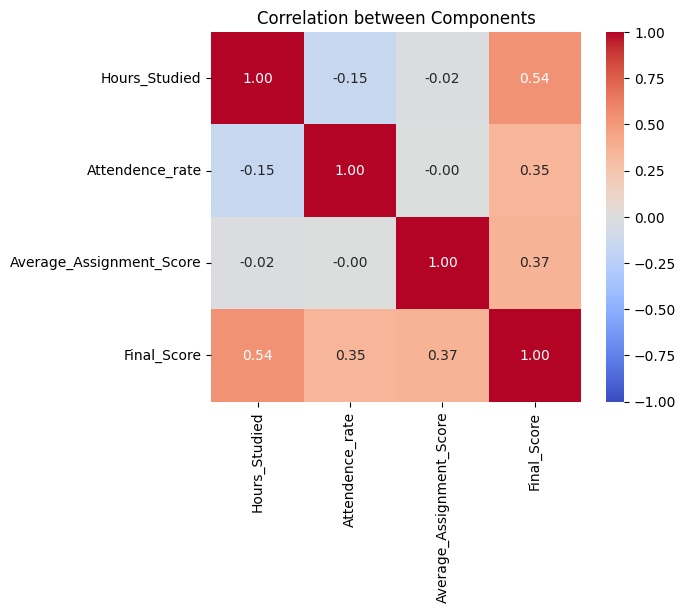

In [68]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, vmin=-1, vmax=1)
plt.title("Correlation between Components")
plt.show()

Text(0.5, 1.0, 'Final Scores')

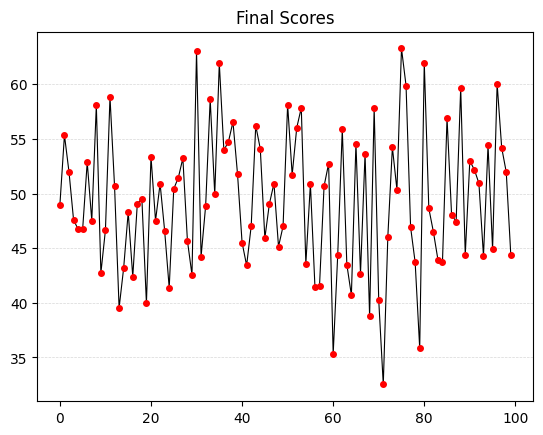

In [69]:
plt.plot(df.Final_Score, marker='o', lw=0.8, markersize=4, markerfacecolor='r', markeredgecolor='red', color='black')
plt.grid(axis='y', linestyle='--', lw=0.5, alpha=0.5)
plt.title("Final Scores")

In [70]:
w_hours_studied = float(input("Enter weight for Hours of Studied : "))
w_attendence_rate = float (input("Enter weight for Attendence Rate : "))
w_ave_assignment_score = float (input("Enter weight for Average Assignemnt Score :"))
b = float(input("Enter Bias : "))

Enter weight for Hours of Studied :  0.5
Enter weight for Attendence Rate :  0.3
Enter weight for Average Assignemnt Score : 0.4
Enter Bias :  1


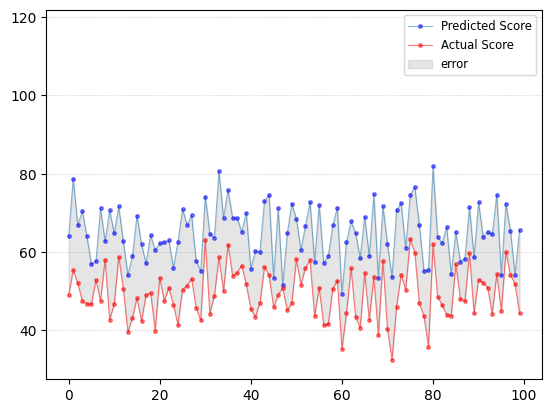

In [75]:
predicted_score = df.Hours_Studied * w_hours_studied + df.Attendence_rate * w_attendence_rate + df.Average_Assignment_Score * w_ave_assignment_score + b
plt.plot(
    predicted_score,
    marker = "o", markerfacecolor='blue', markeredgecolor='blue', markersize=2.5,alpha=0.5,
    lw=0.8, label='Predicted Score'
)

plt.plot(df.Final_Score,
         marker='o', lw=0.8, markersize=2.5, markerfacecolor='r', markeredgecolor='red', color='red', 
         label='Actual Score', alpha=0.5)

plt.fill_between(df.index, df.Final_Score, predicted_score, color='grey', alpha=0.2, label='error')

plt.ylim(df.Final_Score.min() - 5, predicted_score.max() + 40)
plt.legend(loc='best', fontsize='small')
plt.grid(axis='y', linestyle='--', lw=0.5, alpha=0.5)